In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
# Read the dataset
df = pd.read_csv('loan_data_set.csv')

In [4]:
# separating the independent and dependent variable
X = df.drop(['Loan_Status','Loan_ID'],axis=1)
y = df['Loan_Status']

In [5]:
# using the simple imputer to handle the missing values
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(exclude='object').columns

In [6]:
cat_cols

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')

In [7]:
num_cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [8]:

# Finding the outliers
Q1 = X['ApplicantIncome'].quantile(0.25)
Q3 = X['ApplicantIncome'].quantile(0.75)

# Calculating IQR
IQR = Q3-Q1
upper_limit = Q3+1.5*IQR
lower_limit = Q1-1.5*IQR

# this is for removing outlier
outliers = X[(X['ApplicantIncome'] > lower_limit) & (X['ApplicantIncome'] < upper_limit)]

#this is for capping/replace outliers
capped = np.where(X['ApplicantIncome']<lower_limit,lower_limit,
        np.where(X['ApplicantIncome']>upper_limit,upper_limit,X['ApplicantIncome']))

In [9]:
outliers.shape

(564, 11)

In [10]:
capped.shape

(614,)

In [11]:
y.shape

(614,)

In [12]:
# handling the missing values
cat_imput = SimpleImputer(strategy='most_frequent')
num_impute = SimpleImputer(strategy='mean')

--------------

In [13]:
import pandas as pd
import numpy as np

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [15]:
df = pd.read_csv('loan_data_set.csv')

In [16]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [17]:
# Separating the dependent and independent columns 

X = df.drop(['Loan_ID','Loan_Status'],axis=1)
y = df['Loan_Status']

In [18]:
# Separating the cat cols and num cols

cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(exclude='object').columns

In [19]:
num_cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [20]:
cat_cols

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')

In [21]:
# num cols -> simpleimputer -> scaling
num_pipeline = Pipeline(steps=[
    ('num_impute',SimpleImputer(strategy='mean')),
    ('scaling',StandardScaler())])

In [22]:
# fit and transfrom
num_pipeline.fit(X[num_cols])

,steps,"[('num_impute', ...), ('scaling', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [23]:
transformed_data = num_pipeline.transform(X[num_cols])

In [24]:
transformed_data

array([[ 0.07299082, -0.55448733,  0.        ,  0.27985054,  0.45164045],
       [-0.13441195, -0.03873155, -0.21927331,  0.27985054,  0.45164045],
       [-0.39374734, -0.55448733, -0.957641  ,  0.27985054,  0.45164045],
       ...,
       [ 0.43717437, -0.47240418,  1.26937121,  0.27985054,  0.45164045],
       [ 0.35706382, -0.55448733,  0.4833669 ,  0.27985054,  0.45164045],
       [-0.13441195, -0.55448733, -0.15972753,  0.27985054, -2.41044061]],
      shape=(614, 5))

In [25]:
cat_pipeline = Pipeline(steps=[
    ('cat_impute',SimpleImputer(strategy='most_frequent')),
    ('encoding',OneHotEncoder(handle_unknown='ignore',sparse_output=False))
])

In [26]:
# fit and train cat pipeline
cat_pipeline.fit(X[cat_cols])

,steps,"[('cat_impute', ...), ('encoding', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,categories,'auto'


In [27]:
cat_transformed_data = cat_pipeline.transform(X[cat_cols])

In [28]:
pd.DataFrame(cat_transformed_data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
610,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
611,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
612,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [29]:
from sklearn.compose import ColumnTransformer

In [30]:
transformer = ColumnTransformer([
    ('num',num_pipeline,num_cols),
    ('cat',cat_pipeline,cat_cols)
])

In [31]:
transformer.fit(X)

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


In [32]:
Transformed_data = transformer.transform(X)


In [33]:
pd.DataFrame(Transformed_data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.072991,-0.554487,0.000000,0.279851,0.451640,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.134412,-0.038732,-0.219273,0.279851,0.451640,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-0.393747,-0.554487,-0.957641,0.279851,0.451640,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.462062,0.251980,-0.314547,0.279851,0.451640,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.097728,-0.554487,-0.064454,0.279851,0.451640,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.410130,-0.554487,-0.898095,0.279851,0.451640,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
610,-0.212557,-0.554487,-1.267279,-2.518655,0.451640,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
611,0.437174,-0.472404,1.269371,0.279851,0.451640,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
612,0.357064,-0.554487,0.483367,0.279851,0.451640,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [34]:
import seaborn as sns

<Axes: xlabel='LoanAmount', ylabel='Count'>

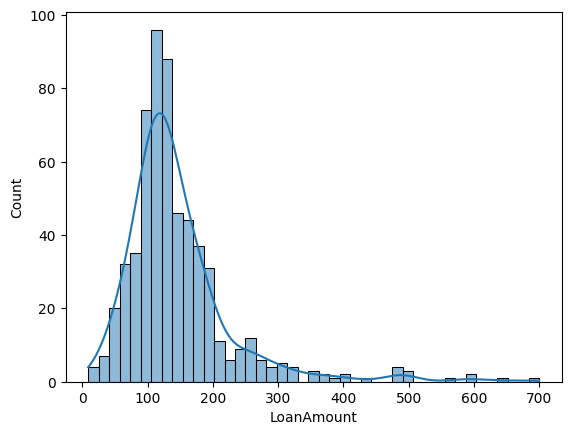

In [35]:
sns.histplot(df['LoanAmount'],kde=True)

In [36]:
# we can tranform this column using the log transformation

from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p)
# log calculate
transformer.fit(df['LoanAmount'])

,func,<ufunc 'log1p'>
,inverse_func,None
,validate,False
,accept_sparse,False
,check_inverse,True
,feature_names_out,None
,kw_args,None
,inv_kw_args,None


In [37]:
# Transform that column
df['LoanAmount']=transformer.transform(df['LoanAmount'])

<Axes: xlabel='LoanAmount', ylabel='Count'>

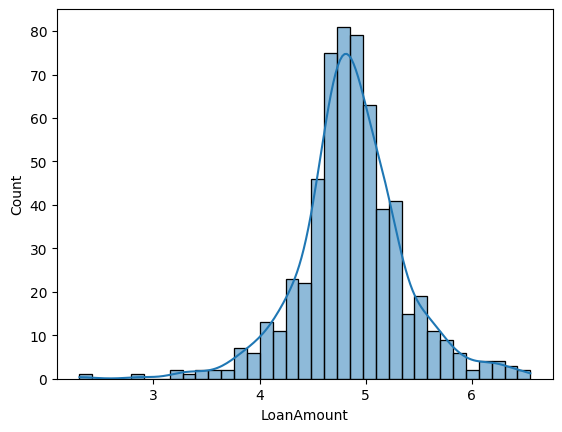

In [38]:
sns.histplot(df['LoanAmount'],kde=True)

In [39]:
num_cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

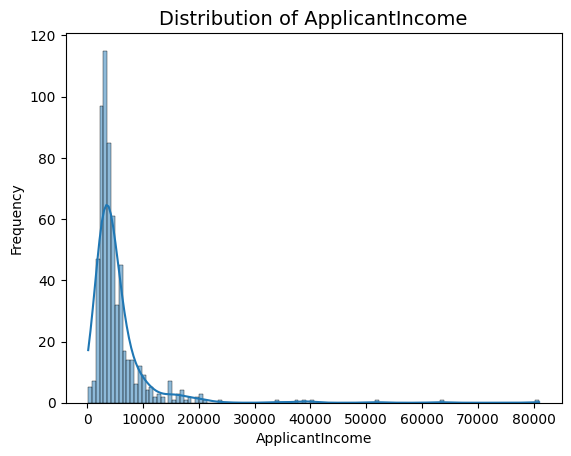

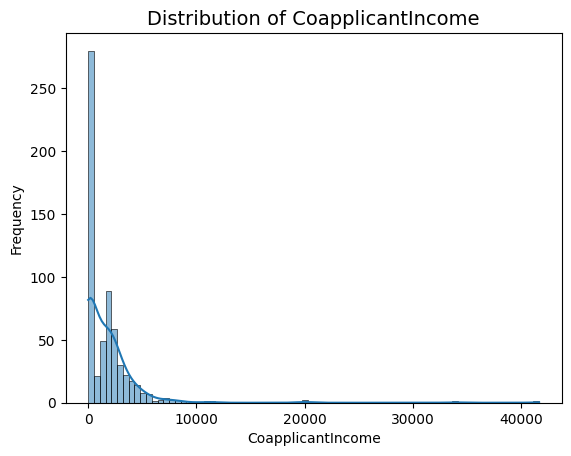

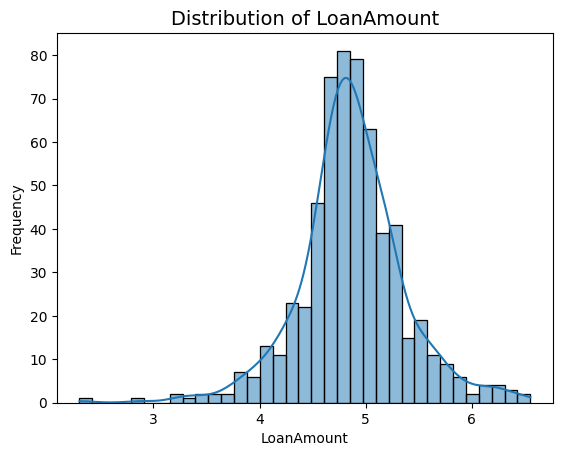

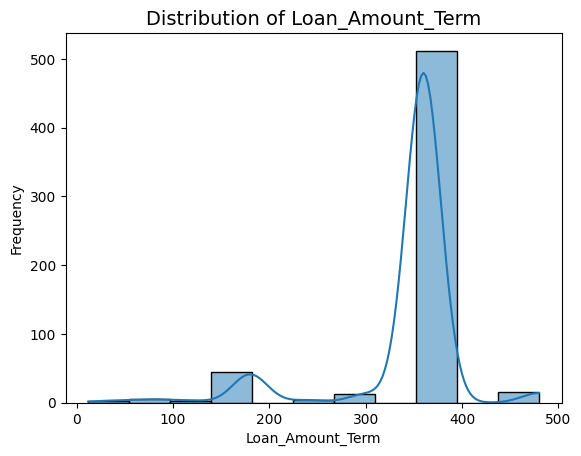

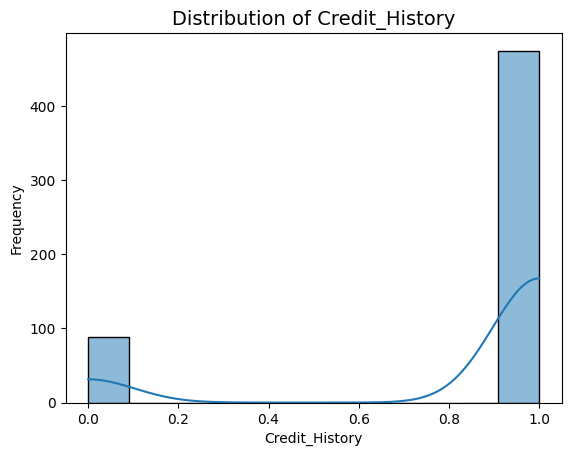

In [40]:
import matplotlib.pyplot as plt
for col in num_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    

In [41]:

transformer = FunctionTransformer(np.square)
# square calculate
transformer.fit(df[['ApplicantIncome']])

,func,<ufunc 'square'>
,inverse_func,None
,validate,False
,accept_sparse,False
,check_inverse,True
,feature_names_out,None
,kw_args,None
,inv_kw_args,None


In [ ]:
# Transform that column
df['ApplicantIncome']=transformer.transform(df['ApplicantIncome'])

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

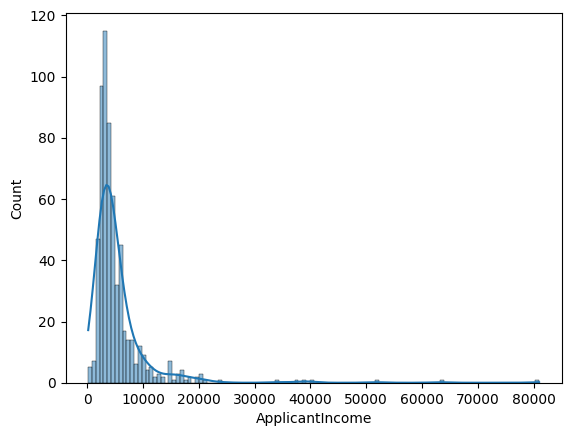

In [43]:
sns.histplot(df['ApplicantIncome'],kde=True)